In [1]:
# Import all necessary Python modules required to run the notebook
import numpy as np
import pandas as pd
import os
import sleap

import matplotlib.pyplot as plt
import seaborn as sns

# Configure Pandas to display dataframes up to 100 rows in full
pd.set_option('display.max_rows', 100)

In [34]:
# This folder should contain a set of folders with the output of training a model in SLEAP
model_folder = "../models"

In [35]:
# List all models in the model folder
[file for file in os.scandir(model_folder) if file.is_dir()]

[<DirEntry 'filter_16-stride_16.240425_031454.centered_instance'>,
 <DirEntry 'filter_16-stride_16.240425_031454.centroid'>,
 <DirEntry 'filter_16-stride_32.240425_031454.centered_instance'>,
 <DirEntry 'filter_16-stride_32.240425_031454.centroid'>,
 <DirEntry 'filter_16-stride_8.240425_031454.centered_instance'>,
 <DirEntry 'filter_16-stride_8.240425_031454.centroid'>,
 <DirEntry 'filter_24-stride_16.240425_031454.centered_instance'>,
 <DirEntry 'filter_24-stride_16.240425_031454.centroid'>,
 <DirEntry 'filter_24-stride_32.240425_031454.centered_instance'>,
 <DirEntry 'filter_24-stride_32.240425_031454.centroid'>,
 <DirEntry 'filter_24-stride_8.240425_031454.centered_instance'>,
 <DirEntry 'filter_24-stride_8.240425_031454.centroid'>,
 <DirEntry 'filter_32-stride_16.240425_031454.centered_instance'>,
 <DirEntry 'filter_32-stride_16.240425_031454.centroid'>,
 <DirEntry 'filter_32-stride_32.240425_031454.centered_instance'>,
 <DirEntry 'filter_32-stride_32.240425_031454.centroid'>,
 <Di

## Summary stats

In [43]:
summary_stats = ['vis.tp',
                 'vis.fp',
                 'vis.tn',
                 'vis.fn',
                 'vis.precision',
                 'vis.recall',
                 'dist.avg',
                 'dist.p50',
                 'dist.p75',
                 'dist.p90',
                 'dist.p95',
                 'dist.p99',
                 'oks_voc.mAP',
                 'oks_voc.mAR',
                 'pck_voc.mAP',
                 'pck_voc.mAR']

metric_type_dict = {
    'metrics.train.npz': 'Training',
    'metrics.val.npz': 'Validation',
    'metrics.test.npz': 'Test'
}

all_stats = []

for entry in os.scandir(model_folder):
    if entry.is_dir():
        for file in os.scandir(entry):
            if file.is_file() and file.name.endswith(".npz"):
                with np.load(file.path, None, True) as np_file:
                    #display(np_file['metrics'][()].keys())
                    stats = {'model': entry.name, 'metric_type': file.name}
                    stats.update({key: np_file['metrics'][()][key][()] for key in np_file['metrics'][()] if key in summary_stats})
                    all_stats.append(stats)

df_all_stats = pd.DataFrame(all_stats).replace({'metric_type': metric_type_dict})
display(df_all_stats)

,model,metric_type,vis.tp,vis.fp,vis.tn,vis.fn,vis.precision,vis.recall,dist.avg,dist.p50,dist.p75,dist.p90,dist.p95,dist.p99,oks_voc.mAP,oks_voc.mAR,pck_voc.mAP,pck_voc.mAR
0,filter_16-stride_16.240425_031454.centered_ins...,Test,2151,26,13,60,0.988057,0.972863,7.377669,2.438176,4.102064,9.196526,24.259810,136.518086,0.612589,0.716000,0.303064,0.416000
1,filter_16-stride_16.240425_031454.centered_ins...,Training,7362,34,111,53,0.995403,0.992852,2.552720,1.925858,2.844546,3.989342,5.148477,10.726367,0.892974,0.930238,0.591400,0.656905
2,filter_16-stride_16.240425_031454.centered_ins...,Validation,2191,21,20,54,0.990506,0.975947,6.654471,2.528315,4.297450,8.759943,22.534353,102.731284,0.628563,0.717323,0.311686,0.402362
3,filter_16-stride_16.240425_031454.centroid,Test,1843,29,0,0,0.984509,1.000000,67.142076,0.000038,83.627622,275.765800,363.309498,466.398455,0.567645,0.608000,0.567645,0.608000
4,filter_16-stride_16.240425_031454.centroid,Training,7222,122,0,0,0.983388,1.000000,36.695223,0.000033,0.000055,187.671002,269.386678,397.738928,0.739357,0.802381,0.739357,0.802381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,part_UpperThorax.240425_031454.centered_instance,Training,7285,20,125,130,0.997262,0.982468,1.770741,1.482828,2.182325,2.957643,3.530983,7.387261,0.924805,0.954048,0.688361,0.749048
80,part_UpperThorax.240425_031454.centered_instance,Validation,2163,16,25,82,0.992657,0.963474,5.256179,2.067168,3.474904,7.209138,15.077620,88.904084,0.680177,0.755118,0.405368,0.485039
81,part_UpperThorax.240425_031454.centroid,Test,1906,20,0,0,0.989616,1.000000,49.220555,0.000034,0.000056,230.472314,328.648420,517.634938,0.657012,0.696000,0.657012,0.696000
82,part_UpperThorax.240425_031454.centroid,Training,7210,116,0,0,0.984166,1.000000,34.113525,0.000033,0.000055,179.458477,245.549178,364.116401,0.745386,0.802381,0.745386,0.802381


## Model Accuracy

### Comparison of all models

N.B. Different model types are not directly comparable to each other (e.g. accuracy measures for centroid models cannot be directly compared to centred instance models).

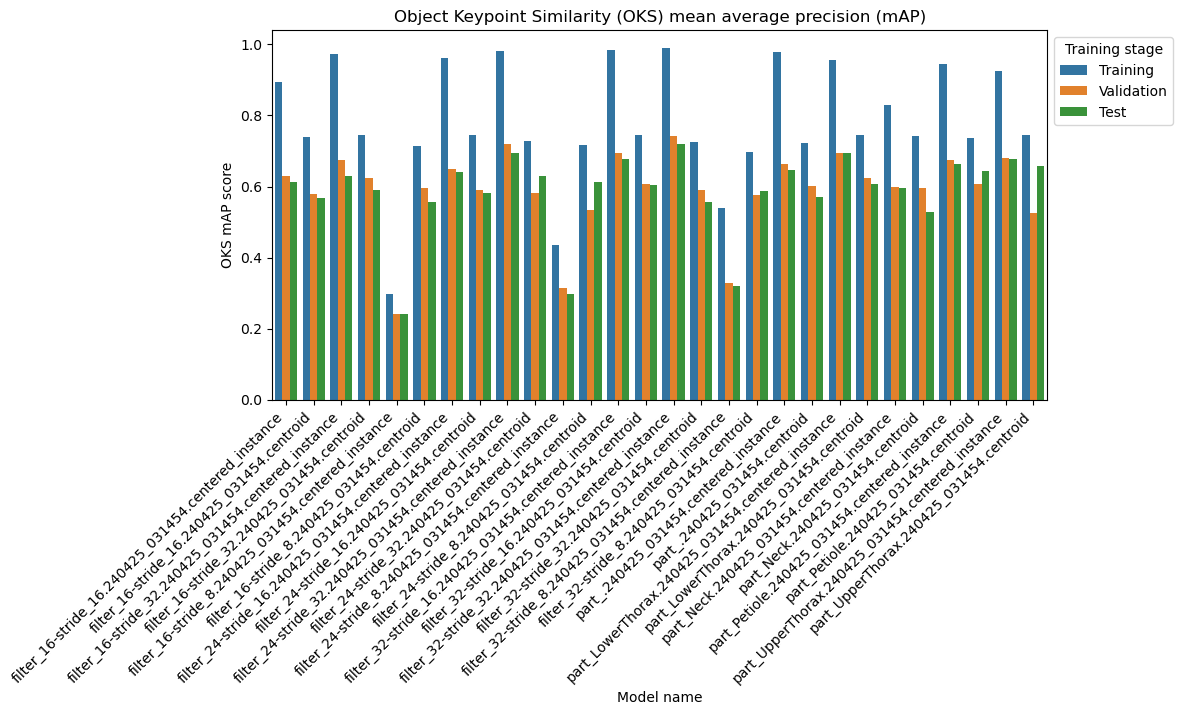

In [54]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
sns.barplot(df_all_stats, x='model', y='oks_voc.mAP', hue='metric_type', ax=ax, hue_order=['Training', 'Validation', 'Test'])

# Set the legend name and reposition
ax.legend(title='Training stage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Format the axes and set the axis names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Model name")
ax.set_ylabel("OKS mAP score")

# Add the plot title and display the plot
ax.set_title("Object Keypoint Similarity (OKS) mean average precision (mAP)")
plt.show()

### Centroid model comparison

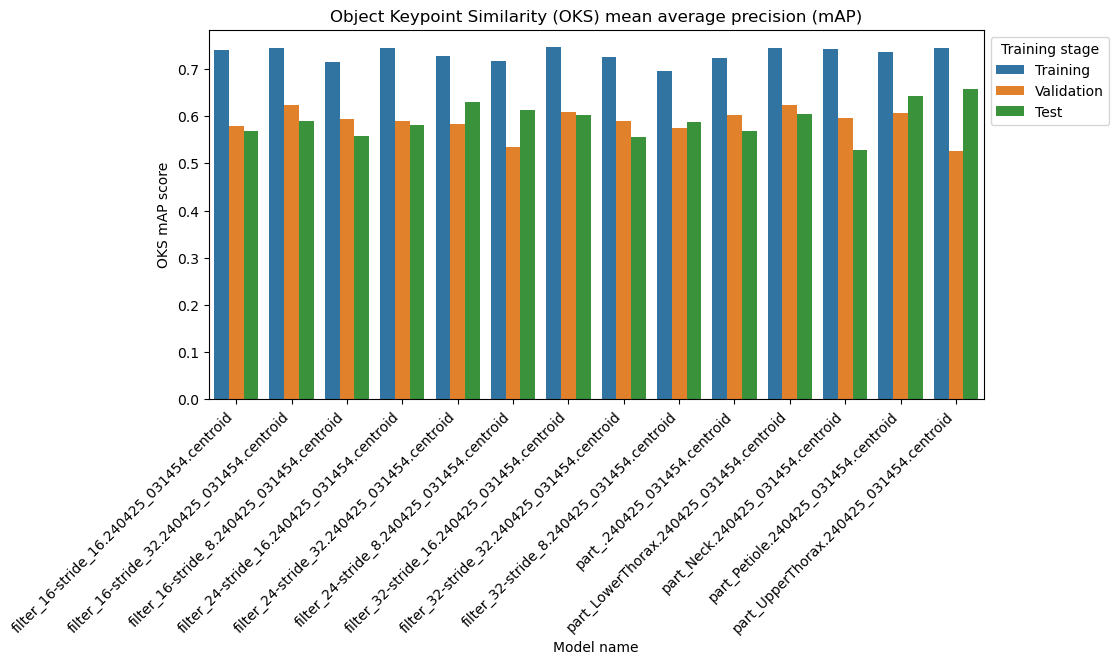

In [56]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
sns.barplot(df_all_stats.loc[df_all_stats['model'].str.endswith('.centroid')], x='model', y='oks_voc.mAP', hue='metric_type', ax=ax, hue_order=['Training', 'Validation', 'Test'])

# Set the legend name and reposition
ax.legend(title='Training stage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Format the axes and set the axis names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Model name")
ax.set_ylabel("OKS mAP score")

# Add the plot title and display the plot
ax.set_title("Object Keypoint Similarity (OKS) mean average precision (mAP)")
plt.show()

### Centred instance model comparison

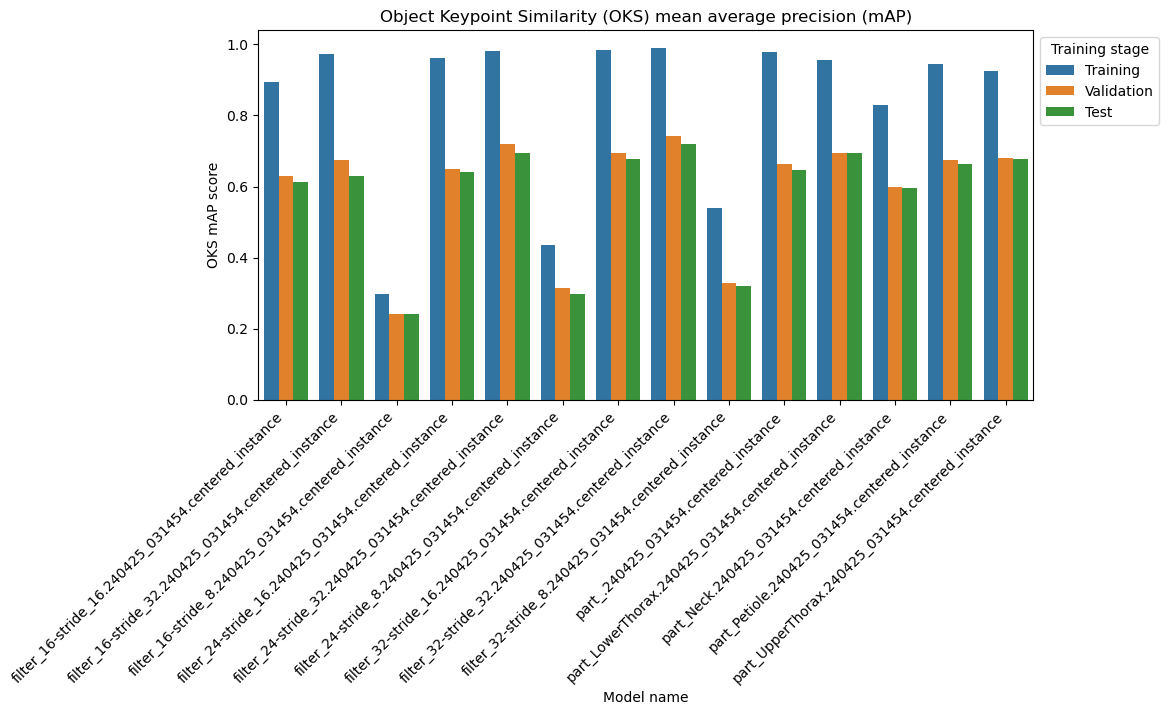

In [57]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
sns.barplot(df_all_stats.loc[df_all_stats['model'].str.endswith('.centered_instance')], x='model', y='oks_voc.mAP', hue='metric_type', ax=ax, hue_order=['Training', 'Validation', 'Test'])

# Set the legend name and reposition
ax.legend(title='Training stage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Format the axes and set the axis names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Model name")
ax.set_ylabel("OKS mAP score")

# Add the plot title and display the plot
ax.set_title("Object Keypoint Similarity (OKS) mean average precision (mAP)")
plt.show()

### Multi-instance model comparison

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

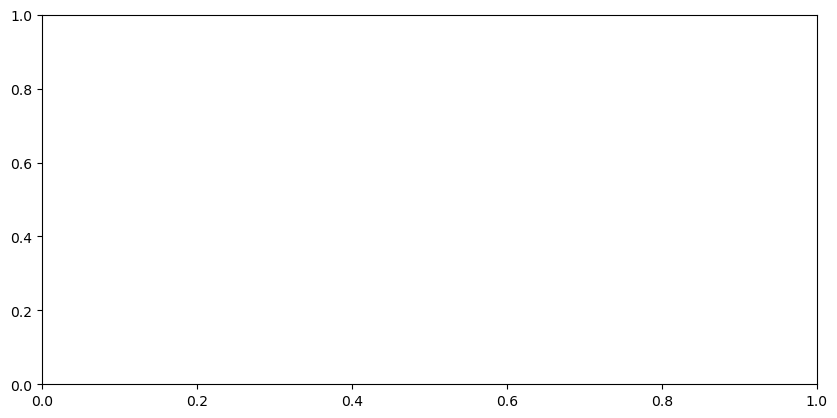

In [58]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
sns.barplot(df_all_stats.loc[df_all_stats['model'].str.endswith('.multi_instance')], x='model', y='oks_voc.mAP', hue='metric_type', ax=ax, hue_order=['Training', 'Validation', 'Test'])

# Set the legend name and reposition
ax.legend(title='Training stage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Format the axes and set the axis names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Model name")
ax.set_ylabel("OKS mAP score")

# Add the plot title and display the plot
ax.set_title("Object Keypoint Similarity (OKS) mean average precision (mAP)")
plt.show()